In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import plotly.express as px
import plotly.graph_objects as go
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

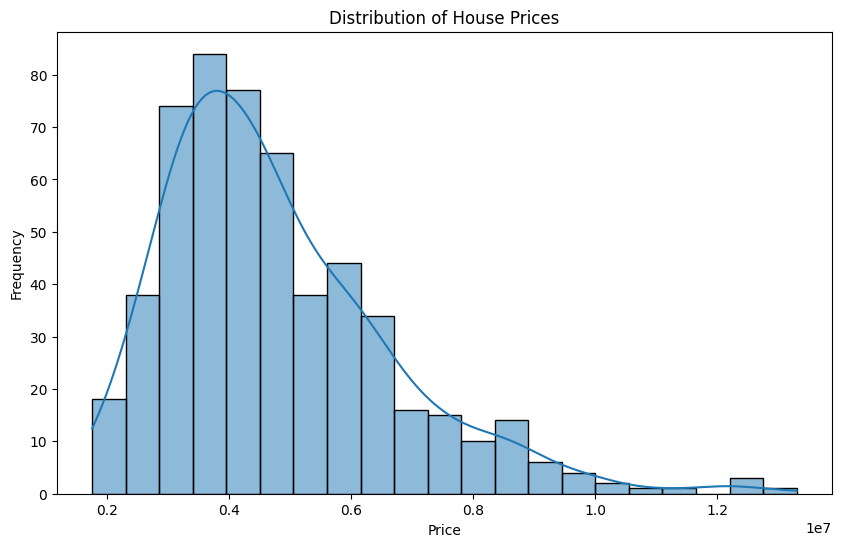

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.savefig('price_distribution.png')
plt.show()
plt.close()

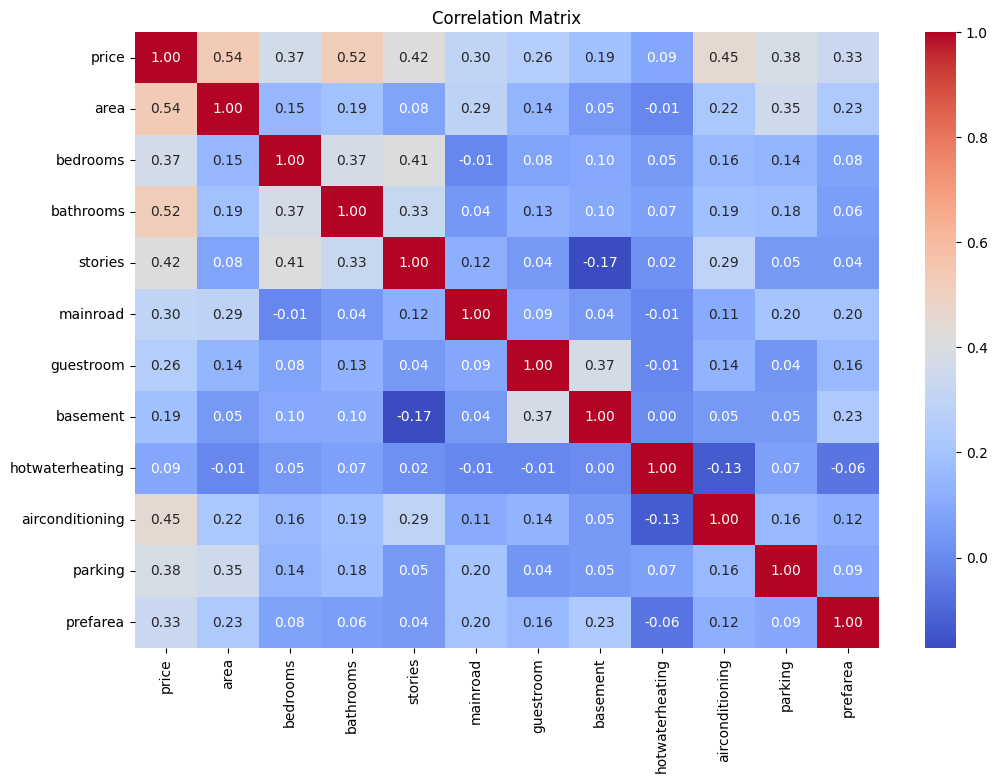

In [10]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()
plt.close()

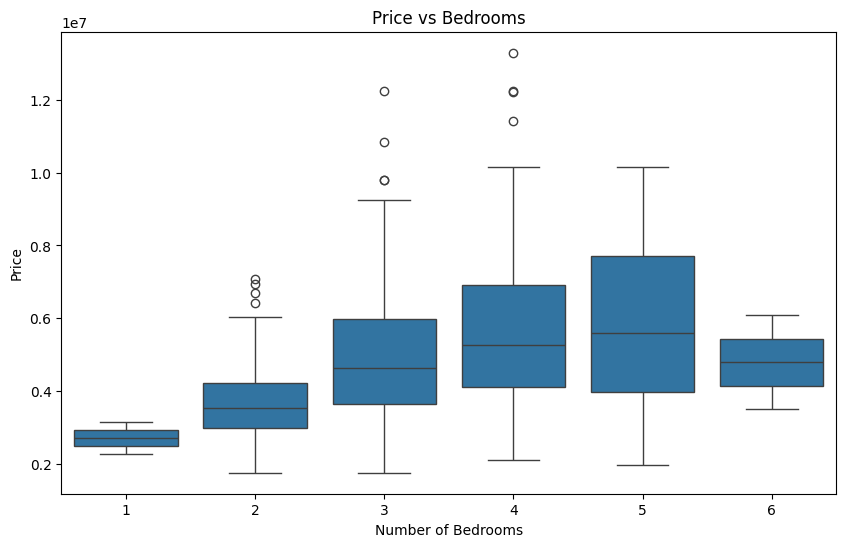

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Price vs Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.savefig('price_vs_bedrooms.png')
plt.show()
plt.close()

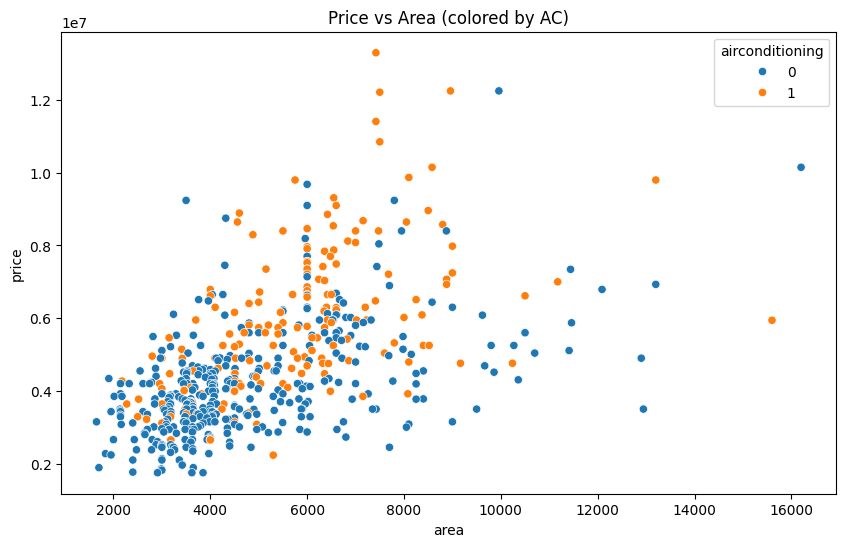

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', hue='airconditioning', data=df) # Hue with AC to see interaction
plt.title('Price vs Area (colored by AC)')
plt.savefig('price_vs_area.png')
plt.show()
plt.close()

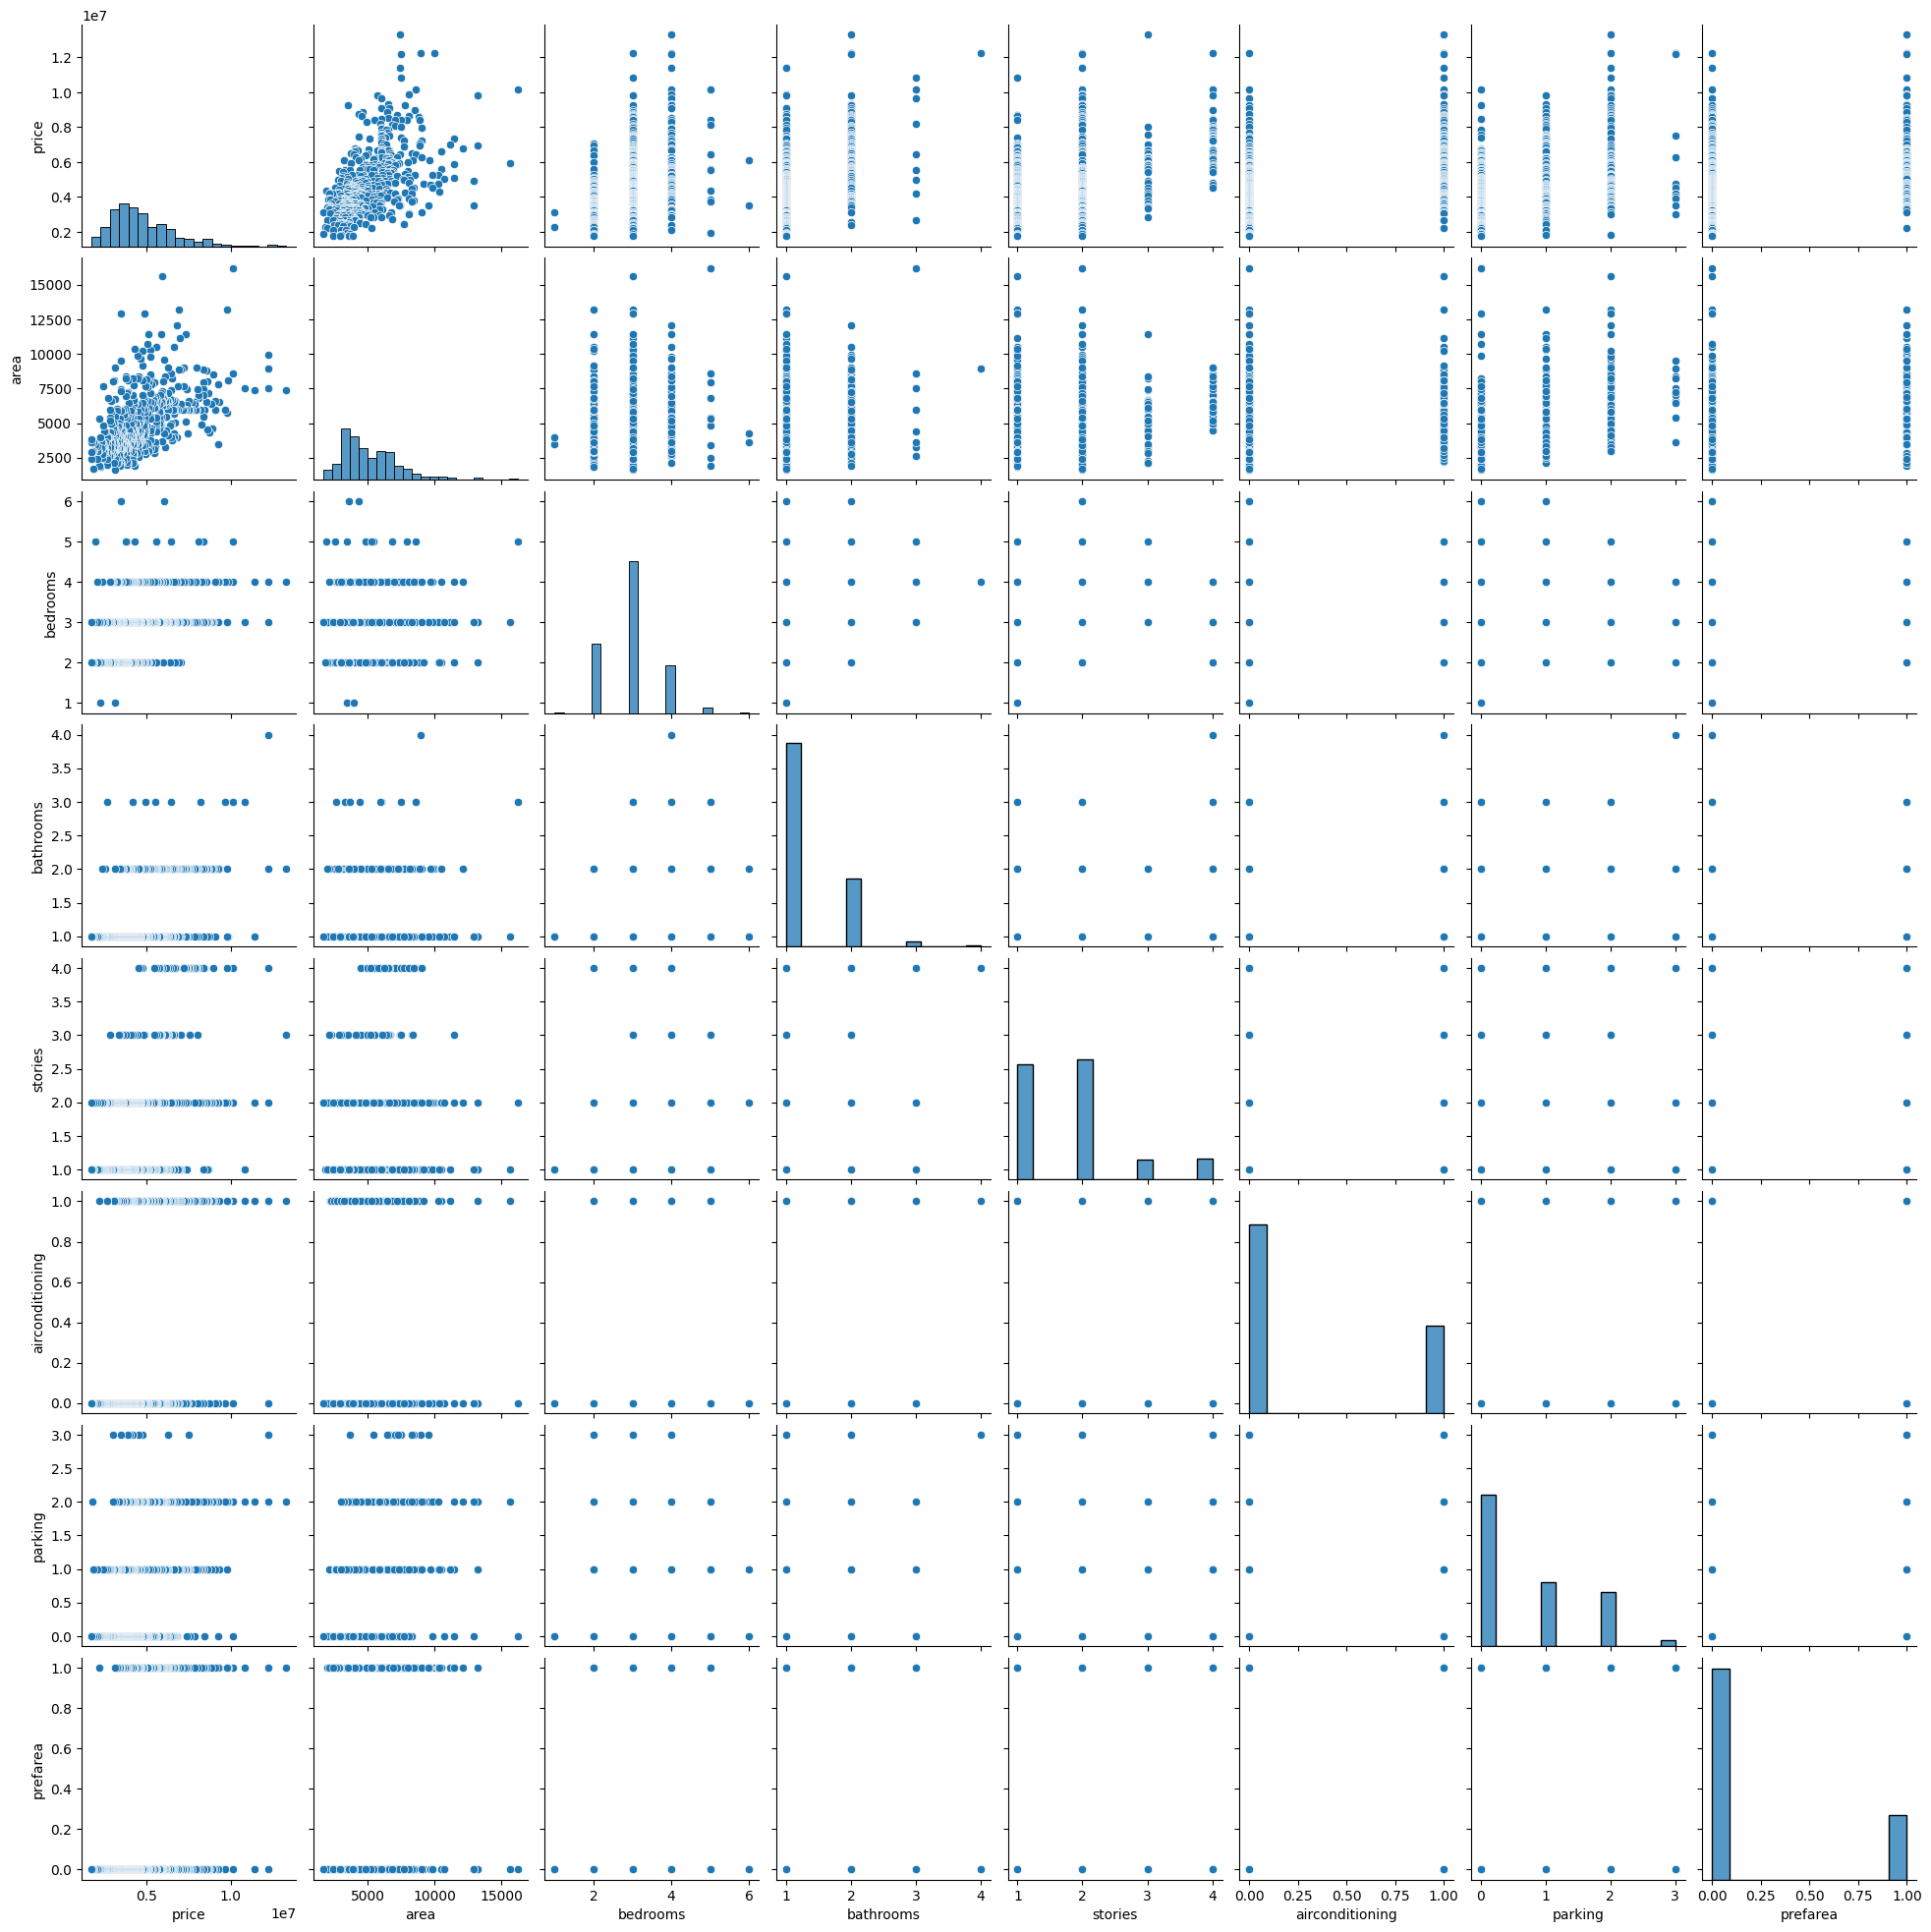

In [13]:
top_corr_features = corr.index[abs(corr['price']) > 0.3] # arbitrary threshold
sns.pairplot(df[top_corr_features])
plt.savefig('pairplot.png')
plt.show()
plt.close()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
df_processed = pd.get_dummies(df, drop_first = True)
X = df_processed.drop('price', axis = 1)
y = df_processed['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}, MSE: {mse}, R2: {r2}')
joblib.dump(model, 'housing_price_model.pkl')

MAE: 1022560.0527522935, MSE: 1964193399645.3335, R2: 0.6114024924156645


['housing_price_model.pkl']

In [17]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}

print("Model Performance:")
print(pd.DataFrame(results).T)

Model Performance:
                            MAE          RMSE        R2
Linear Regression  9.700434e+05  1.324507e+06  0.652924
Random Forest      1.022560e+06  1.401497e+06  0.611402
Gradient Boosting  9.605788e+05  1.299761e+06  0.665772


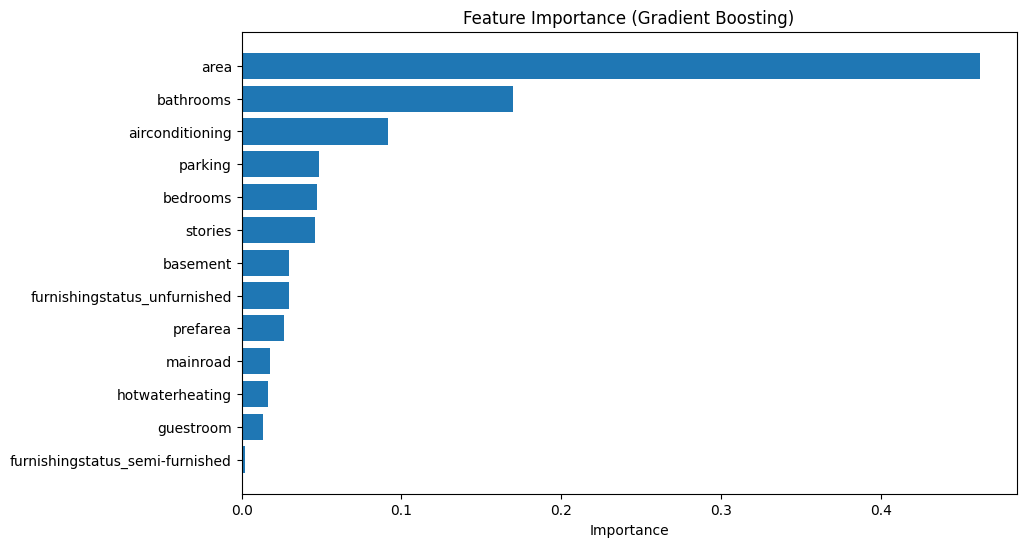

In [18]:
gb_model = models["Gradient Boosting"]
feature_importance = gb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), feature_importance[sorted_idx], align='center')
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance (Gradient Boosting)')
plt.savefig('feature_importance.png')
plt.show()
plt.close()

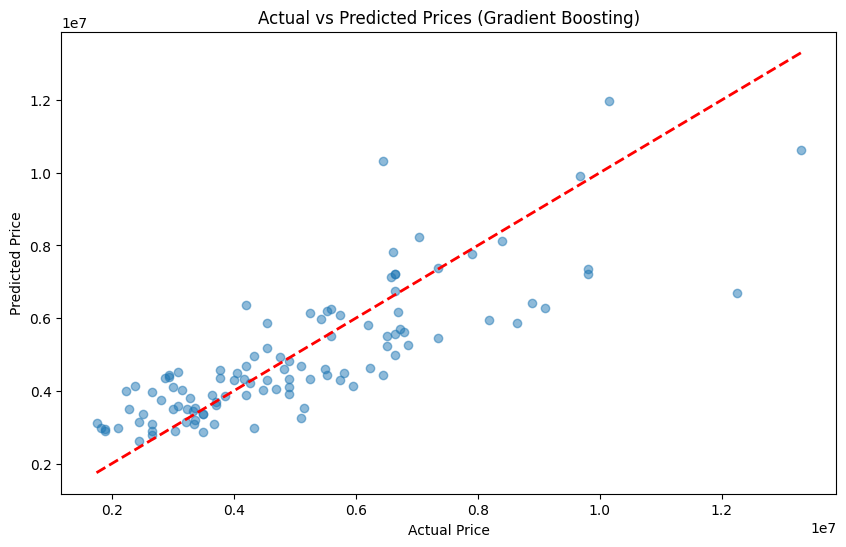

In [19]:
y_pred_gb = gb_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Gradient Boosting)')
plt.savefig('actual_vs_predicted.png')
plt.show()
plt.close()

In [30]:
import dash
from dash import dcc, html, Input, Output, State

df = pd.read_csv('Housing.csv')

binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

df_model = df.copy()
df_model[binary_cols] = df_model[binary_cols].apply(binary_map)
df_model = pd.get_dummies(df_model, columns=['furnishingstatus'], drop_first=True)

X = df_model.drop('price', axis=1)
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

feature_importance = model.feature_importances_
features = X.columns
fi_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=True)

colors = {'background': '#EFEFEF', 'text': '#333333', 'card': '#FFFFFF', 'accent': '#5D6D7E', 'blink_color_1': '#5D6D7E', 'blink_color_2': '#D35400'}

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets, 
                meta_tags=[{"name": "viewport", "content": "width=device-width, initial-scale=1"}])

card_style = {
    'padding': '20px', 'backgroundColor': colors['card'], 'borderRadius': '10px', 
    'boxShadow': '0 4px 8px 0 rgba(0,0,0,0.2)', 'transition': '0.3s'
}

fig_dist = px.histogram(df, x='price', nbins=50, title='Price Distribution', color_discrete_sequence=[colors['accent']])
fig_dist.update_layout(paper_bgcolor=colors['card'], plot_bgcolor=colors['card'], font_color=colors['text'])

corr = df_model.corr()
fig_corr = px.imshow(corr, text_auto=True, aspect="auto", title='Correlation Matrix', color_continuous_scale='RdBu_r')
fig_corr.update_layout(paper_bgcolor=colors['card'], plot_bgcolor=colors['card'], font_color=colors['text'])

fig_box = px.box(df, x='furnishingstatus', y='price', color='furnishingstatus', title='Price Distribution by Furnishing Status')
fig_box.update_layout(paper_bgcolor=colors['card'], plot_bgcolor=colors['card'], font_color=colors['text'])

fig_feat = px.bar(fi_df, x='Importance', y='Feature', orientation='h', title='Feature Importance (Gradient Boosting)', 
                  color_discrete_sequence=[colors['accent']])
fig_feat.update_layout(paper_bgcolor=colors['card'], plot_bgcolor=colors['card'], font_color=colors['text'])


app.layout = html.Div(style={'backgroundColor': colors['background'], 'padding': '20px'}, children=[
    
    html.Div([
        html.H1("Animated House Price Analytics", style={'textAlign': 'center', 'color': colors['text']}),
        html.P("Interactive EDA, Advanced ML, and Animated UI", style={'textAlign': 'center', 'marginBottom': '30px'})
    ], style={'marginBottom': '30px'}),

    html.Div([
        html.Div([
            html.H4("Average Price", style={'color': colors['accent'], 'marginBottom': '5px'}),
            html.H2(f"${df['price'].mean():,.0f}", style={'marginTop': '0px'})
        ], style={**card_style, 'flex': '1', 'marginRight': '10px', 'textAlign': 'center'}),
        
        html.Div([
            html.H4("Best Model R²", style={'color': colors['accent'], 'marginBottom': '5px'}),
            dcc.Graph(id='r2-gauge', config={'displayModeBar': False}, style={'height': '100px'})
        ], style={**card_style, 'flex': '1', 'marginRight': '10px', 'textAlign': 'center', 'height': '150px'}),
        
        html.Div([
            html.H4("Total Listings", style={'color': colors['accent'], 'marginBottom': '5px'}),
            html.H2(f"{len(df)}", style={'marginTop': '0px'})
        ], style={**card_style, 'flex': '1', 'textAlign': 'center'}),
    ], style={'display': 'flex', 'marginBottom': '30px'}),

    dcc.Interval(
        id='interval-component',
        interval=1000, 
        n_intervals=0
    ),

    dcc.Tabs(id='tabs-content', value='tab-eda', children=[
        dcc.Tab(label='Exploratory Data Analysis (Interactive)', value='tab-eda', children=[
            html.Div(style={**card_style, 'marginTop': '20px'}, children=[
                html.H4("Area Filter for Scatter Plot"),
                dcc.RangeSlider(
                    id='area-slider',
                    min=df['area'].min(),
                    max=df['area'].max(),
                    step=500,
                    value=[df['area'].min(), df['area'].max()],
                    marks={int(x): f'{int(x):,}' for x in np.linspace(df['area'].min(), df['area'].max(), 5)},
                    tooltip={"placement": "bottom", "always_visible": True}
                ),
                dcc.Loading(id="loading-scatter", type="default", children=[
                    dcc.Graph(id='price-area-scatter')
                ])
            ]),
            html.Div([
                html.Div(style={**card_style, 'width': '49%', 'display': 'inline-block', 'marginRight': '1%'}, children=[
                    dcc.Graph(figure=fig_dist)
                ]),
                html.Div(style={**card_style, 'width': '49%', 'display': 'inline-block'}, children=[
                    dcc.Graph(figure=fig_box)
                ]),
            ], style={'marginTop': '20px'}),
            html.Div(style={**card_style, 'marginTop': '20px'}, children=[
                dcc.Graph(figure=fig_corr)
            ])
        ]),

        dcc.Tab(label='Model Evaluation & Insights', value='tab-model', children=[
            html.Div([
                html.Div(style={**card_style, 'width': '49%', 'display': 'inline-block', 'marginRight': '1%'}, children=[
                    dcc.Loading(type="default", children=[dcc.Graph(figure=fig_feat)])
                ]),
                html.Div(style={**card_style, 'width': '49%', 'display': 'inline-block'}, children=[
                    dcc.Loading(type="default", children=[
                        dcc.Graph(id='actual-predicted-scatter')
                    ])
                ]),
            ], style={'marginTop': '20px'}),
            html.Div(style={**card_style, 'marginTop': '20px'}, children=[
                html.H3("Performance Metrics (Gradient Boosting)", id='performance-metrics-title', style={'textAlign': 'center', 'color': colors['accent']}),
                html.Table([
                    html.Tr([html.Th("Metric"), html.Th("Value")]),
                    html.Tr([html.Td("R-Squared (R²)"), html.Td(f"{r2:.4f}")]),
                    html.Tr([html.Td("Mean Absolute Error (MAE)"), html.Td(f"${mae:,.2f}")]),
                    html.Tr([html.Td("Root Mean Squared Error (RMSE)"), html.Td(f"${rmse:,.2f}")]),
                ], style={'margin': '0 auto', 'width': '50%', 'textAlign': 'center', 'border': f'1px solid {colors["accent"]}'})
            ])
        ]),

        dcc.Tab(label='Price Prediction Tool', value='tab-predict', children=[
            html.Div(style={**card_style, 'marginTop': '20px'}, children=[
                html.H3("Predict House Price", style={'textAlign': 'center', 'color': colors['accent']}),
                html.Div([
                    html.Div([
                        html.Label("Area (sq ft)", style={'color': colors['text']}), dcc.Input(id='input-area-pred', type='number', value=5000, style={'width': '100%'}),
                        html.Label("Bedrooms"), dcc.Slider(id='input-bedrooms-pred', min=1, max=6, step=1, value=3, marks={i: str(i) for i in range(1, 7)}),
                        html.Label("Bathrooms"), dcc.Slider(id='input-bathrooms-pred', min=1, max=4, step=1, value=1, marks={i: str(i) for i in range(1, 5)}),
                        html.Label("Stories"), dcc.Slider(id='input-stories-pred', min=1, max=4, step=1, value=2, marks={i: str(i) for i in range(1, 5)}),
                        html.Label("Parking"), dcc.Slider(id='input-parking-pred', min=0, max=3, step=1, value=1, marks={i: str(i) for i in range(0, 4)}),
                    ], style={'width': '30%', 'display': 'inline-block', 'verticalAlign': 'top', 'padding': '20px', 'marginRight': '3%'}),

                    html.Div([
                        html.Label("Main Road"), dcc.Dropdown(id='input-mainroad-pred', options=[{'label': i, 'value': i} for i in ['yes', 'no']], value='yes'),
                        html.Label("Guest Room"), dcc.Dropdown(id='input-guestroom-pred', options=[{'label': i, 'value': i} for i in ['yes', 'no']], value='no'),
                        html.Label("Basement"), dcc.Dropdown(id='input-basement-pred', options=[{'label': i, 'value': i} for i in ['yes', 'no']], value='no'),
                        html.Label("Hot Water Heating"), dcc.Dropdown(id='input-heating-pred', options=[{'label': i, 'value': i} for i in ['yes', 'no']], value='no'),
                        html.Label("Air Conditioning"), dcc.Dropdown(id='input-ac-pred', options=[{'label': i, 'value': i} for i in ['yes', 'no']], value='yes'),
                        html.Label("Preferred Area"), dcc.Dropdown(id='input-prefarea-pred', options=[{'label': i, 'value': i} for i in ['yes', 'no']], value='yes'),
                        html.Label("Furnishing Status"), dcc.Dropdown(id='input-furnishing-pred', options=[{'label': i.title(), 'value': i} for i in ['furnished', 'semi-furnished', 'unfurnished']], value='furnished'),
                    ], style={'width': '30%', 'display': 'inline-block', 'verticalAlign': 'top', 'padding': '20px', 'marginRight': '3%'}),
                    
                    html.Div(style={'width': '30%', 'display': 'inline-block', 'verticalAlign': 'top', 'padding': '20px', 'textAlign': 'center'}, children=[
                        html.Button('Predict Price', id='predict-button', n_clicks=0, 
                                    style={'fontSize': '18px', 'marginBottom': '20px', 'backgroundColor': colors['accent'], 'color': 'white', 'border': 'none', 'borderRadius': '5px', 'padding': '10px 20px'}),
                        dcc.Loading(type="circle", children=[
                            html.H2(id='prediction-output', style={'color': '#1E8449'})
                        ])
                    ])
                ], style={'display': 'flex'})
            ])
        ])
    ])
])

@app.callback(
    Output('performance-metrics-title', 'style'),
    Input('interval-component', 'n_intervals')
)
def update_title_color(n):
    base_style = {'textAlign': 'center', 'transition': 'color 0.5s linear'}
    if n % 2 == 0:
        base_style['color'] = colors['blink_color_1'] 
    else:
        base_style['color'] = colors['blink_color_2'] 
    return base_style


@app.callback(
    Output('r2-gauge', 'figure'),
    Input('tabs-content', 'value')
)
def update_r2_gauge(tab_name):
    fig = go.Figure(go.Indicator(
        mode = "gauge+number",
        value = r2,
        domain = {'x': [0, 1], 'y': [0, 1]},
        title = {'text': "R² Score", 'font': {'size': 14}},
        gauge = {
            'axis': {'range': [None, 1], 'tickwidth': 1, 'tickcolor': "darkblue"},
            'bar': {'color': colors['accent']},
            'bgcolor': "white",
            'borderwidth': 2,
            'bordercolor': "gray",
            'steps': [
                 {'range': [0, 0.5], 'color': 'lightgray'},
                 {'range': [0.5, 0.75], 'color': 'gray'}],
            'threshold': {
                'line': {'color': "red", 'width': 4},
                'thickness': 0.75,
                'value': r2
            }
        }))
    fig.update_layout(height=150, margin={'t':10, 'b':10, 'l':20, 'r':20}, 
                      paper_bgcolor=colors['card'], font_color=colors['text'])
    return fig

@app.callback(
    Output('actual-predicted-scatter', 'figure'),
    Input('tabs-content', 'value')
)
def update_actual_predicted(tab_name):
    plot_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
    
    fig = px.scatter(plot_df, x='Actual Price', y='Predicted Price', 
                     title='Actual vs Predicted Prices (Gradient Boosting)',
                     color_discrete_sequence=[colors['accent']])
    
    fig.add_shape(type="line", line=dict(dash='dash', color='red'),
        x0=y_test.min(), y0=y_test.min(), x1=y_test.max(), y1=y_test.max())

    fig.update_traces(marker=dict(size=8, opacity=0.7), selector=dict(mode='markers'))
    fig.update_layout(transition_duration=500,
                      paper_bgcolor=colors['card'], plot_bgcolor=colors['card'], font_color=colors['text'])
    return fig

@app.callback(
    Output('price-area-scatter', 'figure'),
    Input('area-slider', 'value')
)
def update_area_scatter(area_range):
    min_area, max_area = area_range
    filtered_df = df[(df['area'] >= min_area) & (df['area'] <= max_area)]
    
    fig = px.scatter(filtered_df, x='area', y='price', color='airconditioning', 
                     title=f'Price vs Area (Area: {min_area:,} to {max_area:,})',
                     color_discrete_map={'yes': colors['accent'], 'no': '#AAB7B8'},
                     hover_data=['bedrooms', 'stories'])

    fig.update_traces(marker=dict(size=8, opacity=0.7), selector=dict(mode='markers'))
    fig.update_layout(transition_duration=500,
                      paper_bgcolor=colors['card'], plot_bgcolor=colors['card'], font_color=colors['text'])
    return fig


@app.callback(
    Output('prediction-output', 'children'),
    Input('predict-button', 'n_clicks'),
    State('input-area-pred', 'value'),
    State('input-bedrooms-pred', 'value'),
    State('input-bathrooms-pred', 'value'),
    State('input-stories-pred', 'value'),
    State('input-parking-pred', 'value'),
    State('input-mainroad-pred', 'value'),
    State('input-guestroom-pred', 'value'),
    State('input-basement-pred', 'value'),
    State('input-heating-pred', 'value'),
    State('input-ac-pred', 'value'),
    State('input-prefarea-pred', 'value'),
    State('input-furnishing-pred', 'value')
)
def update_prediction(n_clicks, area, bedrooms, bathrooms, stories, parking, mainroad, guestroom, basement, heating, ac, prefarea, furnishing):
    if n_clicks > 0:
        if not all([area, bedrooms, bathrooms, stories, parking, mainroad, guestroom, basement, heating, ac, prefarea, furnishing]):
             return "Please fill all fields."
             
        input_data = {
            'area': [area], 'bedrooms': [bedrooms], 'bathrooms': [bathrooms], 'stories': [stories],
            'mainroad': [1 if mainroad == 'yes' else 0],
            'guestroom': [1 if guestroom == 'yes' else 0],
            'basement': [1 if basement == 'yes' else 0],
            'hotwaterheating': [1 if heating == 'yes' else 0],
            'airconditioning': [1 if ac == 'yes' else 0],
            'parking': [parking],
            'prefarea': [1 if prefarea == 'yes' else 0],
            'furnishingstatus_semi-furnished': [1 if furnishing == 'semi-furnished' else 0],
            'furnishingstatus_unfurnished': [1 if furnishing == 'unfurnished' else 0]
        }
        
        input_df = pd.DataFrame(input_data)
        
        for c in X.columns:
            if c not in input_df.columns:
                input_df[c] = 0
        
        input_df = input_df[X.columns]
        
        prediction = model.predict(input_df)[0]
        return f"${prediction:,.0f}"
    
    return "Enter details and press Predict"

if __name__ == '__main__':
    app.run_server(debug=True)